In [1]:
import pandas as pd
import numpy as np
import DataLoading
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from scipy import signal


header = {"mainGrid", "otherGrids", "hourOfDay"}
#three year power supply records from 1995 to 1998

df = pd.read_csv('powerSupplyStream.csv')
df['hourOfDay'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [2]:
df = pd.read_csv('powerSupplyStream.csv')


# create timestamps
start = datetime.datetime(1995, 1, 1, 0)
timestamp_list = [start + datetime.timedelta(hours=x) for x in range(len(df))]
df['timestamps'] = timestamp_list

# mistake in hours numbering hour 6 = 1248 instances
# #                                 9 = 1246 instances
wrongHoursIndex = 24969
for i in np.arange(len(df)-1):
    if df['hourOfDay'][i]+1 != df['hourOfDay'][i + 1] and df['hourOfDay'][i] != 23:
        print(i)
df.at[wrongHoursIndex, 'hourOfDay'] = 9
# There are 2 wrong index not only one 

df_train, df_test = train_test_split(df, test_size=3528, shuffle=False)
# hourly change in consumption
diffMain = np.append(np.array(df_train['mainGrid']), 0) - np.append(0,np.array(df_train['mainGrid']))
diffMain = diffMain[0:-1]
diffMain[0] = 0
diffOther = np.append(np.array(df_train['otherGrids']), 0) - np.append(0,np.array(df_train['otherGrids']))
diffOther = diffOther[0:-1]
diffOther[0] = 0

df_train['diffMain'] = diffMain
df_train['diffOther'] = diffOther

# df_hourDiffMain = pd.DataFrame()
# for hour in np.arange(24):
#     hourDiffList = df_train.loc[df_train['hourOfDay'] == hour]['diffMain'].values

#     df_hourDiffMain[str(hour)] = hourDiffList

24968
24969


In [3]:
df

,Unnamed: 0,mainGrid,otherGrids,hourOfDay,timestamps
0,0,117.4,127.0,0,1995-01-01 00:00:00
1,1,139.1,126.0,1,1995-01-01 01:00:00
2,2,128.0,120.0,2,1995-01-01 02:00:00
3,3,127.0,112.0,3,1995-01-01 03:00:00
4,4,122.8,110.0,4,1995-01-01 04:00:00
...,...,...,...,...,...
29923,29923,152.0,144.0,19,1998-05-31 19:00:00
29924,29924,148.0,140.0,20,1998-05-31 20:00:00
29925,29925,151.0,143.0,21,1998-05-31 21:00:00
29926,29926,168.0,161.0,22,1998-05-31 22:00:00


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

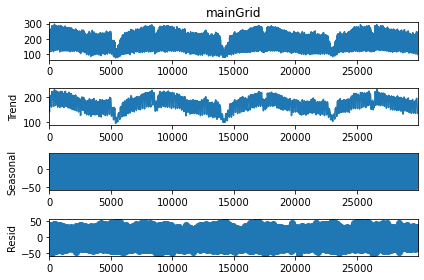

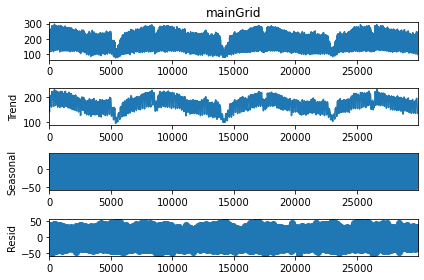

In [53]:
# decompose by day
df_test = pd.read_csv('powerSupplyStream.csv')
main_grid = df_test['mainGrid']
decompose_result = seasonal_decompose(main_grid, model="aditive", period=24)
decompose_result.plot()

<AxesSubplot:>

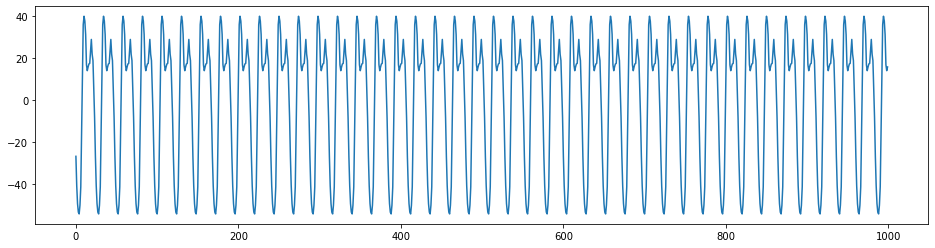

In [54]:
decompose_result.seasonal.head(1000).plot(figsize=(16, 4))

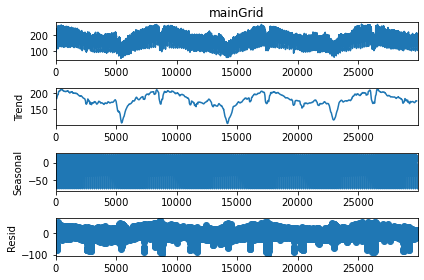

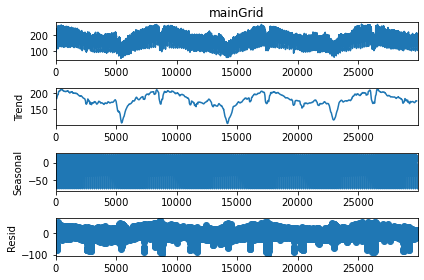

In [55]:
# decompose by week
main_grid -= decompose_result.seasonal
decompose_result = seasonal_decompose(main_grid, model="aditive", period=24*7)
decompose_result.plot()

<AxesSubplot:>

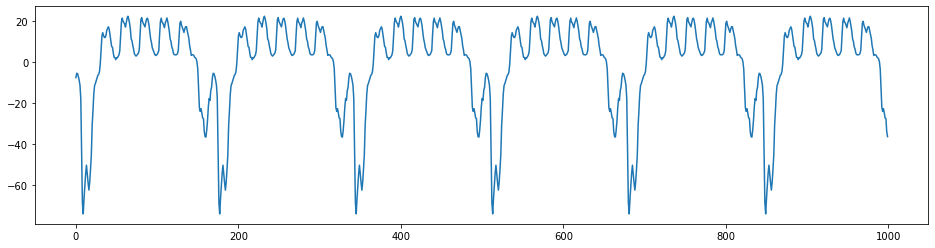

In [56]:
decompose_result.seasonal.head(1000).plot(figsize=(16, 4))

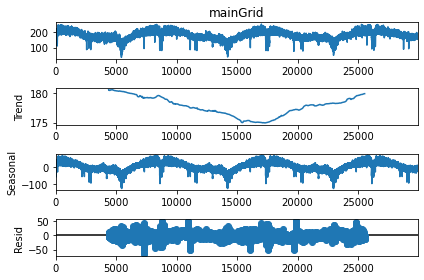

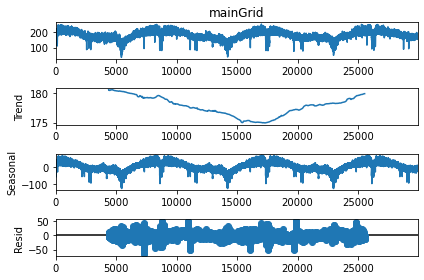

In [57]:
# decompose by year
main_grid -= decompose_result.seasonal
decompose_result = seasonal_decompose(main_grid, model="aditive", period=24*365)
decompose_result.plot()

<AxesSubplot:>

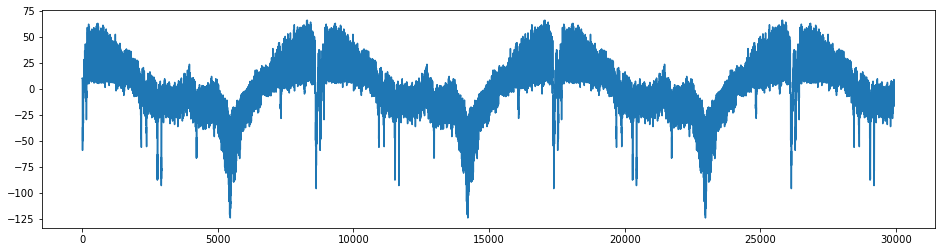

In [58]:
decompose_result.seasonal.plot(figsize=(16, 4))

-1.4496012892726777


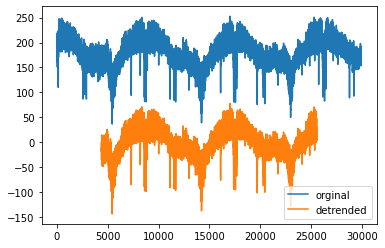

In [59]:
detrended = decompose_result.observed - decompose_result.trend
decompose_result.observed.plot(label="orginal")
detrended.plot(label="detrended")
plt.legend()
print(detrended.mean())

0.11685416119778162


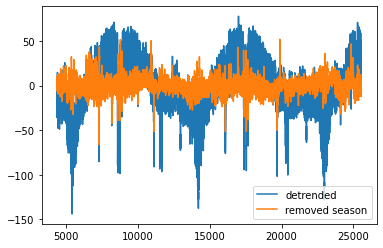

In [60]:
deseason = detrended - decompose_result.seasonal
detrended.plot(label="detrended")
deseason.plot(label="removed season")
plt.legend()
print(deseason.mean())

0.0


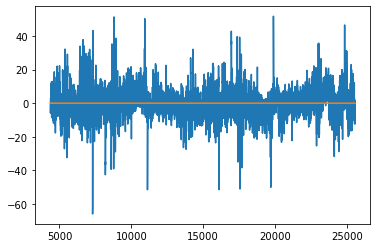

In [61]:
decomposed = deseason - decompose_result.resid
deseason.plot(label="removed trend and season")
decomposed.plot(label="clean")
print(decomposed.mean())